In [1]:
import pandas as pd

In [2]:
#Reading the json file
data=pd.read_json("C:\\Users\\Biranchi\\Desktop\\Internship\\Projects\\Project_Cell_phone_review\\Cell_Phones_and_Accessories.json")
data 

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None
...,...,...,...,...,...,...,...,...,...,...,...
760445,4,False,"07 12, 2014",B00C3V9M8A,None,momahjoub,Very good,Four Stars,1405123200,None,None
760446,5,False,"07 13, 2016",B0178BYS24,None,Cindy,My name is Cynthia Beard and I believe that th...,... believe that the Samsung Galaxy car mount ...,1468368000,None,None
760447,4,True,"07 23, 2015",B009KY47CE,None,zzrnam11,This iphone case is very durable and long last...,I LOVE THIS,1437609600,None,None
760448,5,True,"12 14, 2015",B00X60AYDY,{'Style:': ' 6-in-1 Silver'},ACER,great,Five Stars,1450051200,None,None


# Data Preprocessing

Exploratory Data Analysis

In [6]:
print("Shape of Dataset: ",data.shape)

Shape of Dataset:  (760450, 11)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760450 entries, 0 to 760449
Data columns (total 11 columns):
Rating              760450 non-null int64
Rev_verify          760450 non-null bool
Review_Date         760450 non-null object
IC                  760450 non-null object
Prod_meta           407826 non-null object
Reviewer_Name       760359 non-null object
Review              759920 non-null object
Rev_summ            760095 non-null object
Review_timestamp    760450 non-null int64
Useful              62200 non-null object
Prod_img            18194 non-null object
dtypes: bool(1), int64(2), object(8)
memory usage: 64.5+ MB


In [8]:
print(data.describe())

              Rating  Review_timestamp
count  760450.000000      7.604500e+05
mean        4.221357      1.440417e+09
std         1.232186      4.563251e+07
min         1.000000      1.035331e+09
25%         4.000000      1.416355e+09
50%         5.000000      1.444349e+09
75%         5.000000      1.470442e+09
max         5.000000      1.538438e+09


AxesSubplot(0.125,0.125;0.62x0.755)


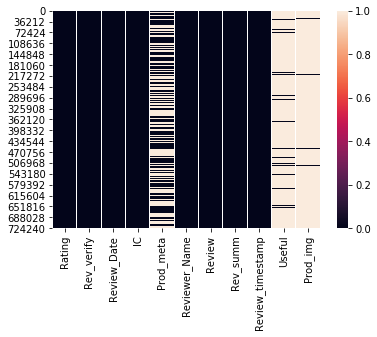

In [10]:
#Checking null values
import matplotlib.pyplot as plt
import seaborn as sns

null_clms=data.isna()
print(sns.heatmap(null_clms))

In [11]:
#featurewise total null values
data.isna().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                 530
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img            742256
dtype: int64

We perform topic modeling on Review so the columns with null values are not required by us so we drop those rows having null review and review_summ after joining the review and Rev_summ columns.

In [20]:
#Cheking uniques values in the respective columns of the dataset

#unique values can't be counted from prod_meta and prod_img columns of the dataset
#as prod_meta & prod_img datatypes are unhashable datatypes.

data2=data.drop(['Prod_meta','Prod_img'],axis=1)
data2.nunique()

Rating                   5
Rev_verify               2
Review_Date           4362
IC                   48134
Reviewer_Name       121464
Review              637152
Rev_summ            366617
Review_timestamp      4362
Useful                 386
dtype: int64

Univariate and bivariate analysis

Rating analysis

In [12]:
#Rating wise counts
data.Rating.value_counts()

5    476637
4    123961
3     66391
1     54993
2     38468
Name: Rating, dtype: int64

In [13]:
#Most of the products have reviewed 5 rating out of 5.
#let see the percentages of Ratings
print("5 rating :",round(len(data[data['Rating']==5])/len(data['Rating']),4)*100,"%")
print("4 rating :",round(len(data[data['Rating']==4])/len(data['Rating']),4)*100,"%")
print("3 rating :",round(len(data[data['Rating']==3])/len(data['Rating']),4)*100,"%")
print("2 rating :",round(len(data[data['Rating']==2])/len(data['Rating']),4)*100,"%")
print("1 rating :",round(len(data[data['Rating']==1])/len(data['Rating']),4)*100,"%")

5 rating : 62.68 %
4 rating : 16.3 %
3 rating : 8.73 %
2 rating : 5.06 %
1 rating : 7.23 %


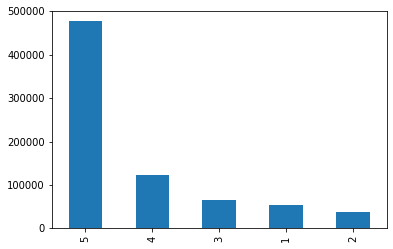

In [14]:
#Graphical representation of rating wise counts
data.Rating.value_counts().plot.bar()

Rev_verify

In [15]:
#Rev_verify counts
data.Rev_verify.value_counts()

True     665454
False     94996
Name: Rev_verify, dtype: int64

In [16]:
print("Review Verified     :",round(len(data[data['Rev_verify']==True])/len(data['Rev_verify']),4)*100,"%")
print("Review not Verified :",round(len(data[data['Rev_verify']==False])/len(data['Rev_verify']),4)*100,"%")

Review Verified     : 87.51 %
Review not Verified : 12.49 %


Most of the review i.e. 87.51% of review are verified.

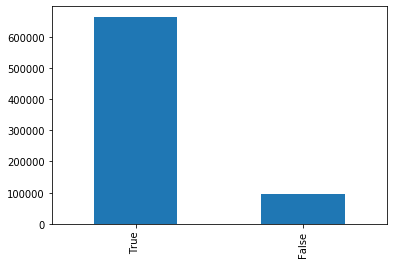

In [17]:
#Graphical representation of verified and not verified reviews
data.Rev_verify.value_counts().plot.bar()

Datewise rating analysis

In [26]:
#Changing the dtype of Review_Date
data['Review_Date']=pd.to_datetime(data['Review_Date'])

In [33]:
#Analysing Year and Monthwise product ratings
df_Review_date=pd.DataFrame()
df_Review_date['Year']=data.Review_Date.dt.year
df_Review_date['Month']=data.Review_Date.dt.month_name()
df_Review_date['Day']=data.Review_Date.dt.day_name()
df_Review_date['Rating']=data.Rating
df_Review_date.head()

,Year,Month,Day,Rating
0,2015,September,Tuesday,5
1,2016,January,Saturday,5
2,2013,April,Sunday,5
3,2013,February,Wednesday,3
4,2013,December,Thursday,4


In [35]:
#Yearwise rating
df_Review_date.Year.value_counts()

2015    217807
2016    210372
2014    124959
2017     89620
2013     58408
2018     28270
2012     19004
2011      6131
2010      2344
2009      1648
2008      1110
2007       449
2006       209
2005        82
2004        26
2003         9
2002         2
Name: Year, dtype: int64

In [40]:
#monthwise rating 
df_Review_date.Month.value_counts()

January      72514
December     69155
March        66567
July         65851
August       65212
February     61779
October      61029
April        60629
November     60409
September    59896
June         58818
May          58591
Name: Month, dtype: int64

In [41]:
#Daywise rating
df_Review_date.Day.value_counts()

Monday       122183
Tuesday      119626
Wednesday    117079
Thursday     112637
Friday       104820
Sunday        92967
Saturday      91138
Name: Day, dtype: int64

This is the Cell_Phone_review dataset of 2002 to 2018. Highest rating are given in the year of 2015

IC feature analysis

In [45]:
data.IC.value_counts()

B00VH88CJ0    1127
B005NF5NTK    1106
B019PV2I3G    1033
B00X5RV14Y    1018
B00P7N0320    1011
              ... 
B01D2OCWFQ       1
B00B37SR4U       1
B0091959C0       1
B00UKFT7DG       1
B00NCK9WTA       1
Name: IC, Length: 48134, dtype: int64

In [46]:
#The Dataset contains 48134 unique cell phones reviews lets check some of them manually
data[data['IC']=='B00VH88CJ0']

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
334,3,True,2017-08-19,B00VH88CJ0,{'Color:': ' Black'},truck guy,good car charger,Three Stars,1503100800,None,None
1175,5,True,2016-08-18,B00VH88CJ0,{'Color:': ' Black'},Javier Ruiz,I love this charger. Like everything I have pu...,Another great Anker device!,1471478400,None,None
2897,5,True,2016-04-14,B00VH88CJ0,{'Color:': ' Black'},H. Reyes,Anker is setting a new standard for usb device...,"Works great,",1460592000,None,None
3814,5,True,2018-05-18,B00VH88CJ0,{'Color:': ' Black'},Inkblots,"Like other Anker products, a dependable and ef...",Excellent car charger,1526601600,None,None
3878,5,True,2018-07-03,B00VH88CJ0,{'Color:': ' Black'},Lonnie,This charger is working great in my wife's car...,No complaints,1530576000,None,None
...,...,...,...,...,...,...,...,...,...,...,...
758405,5,True,2016-04-18,B00VH88CJ0,{'Color:': ' Black'},RobertB,Works great in my car. Feels lighter than expe...,Works great in my car,1460937600,None,None
758578,5,True,2016-12-23,B00VH88CJ0,{'Color:': ' Black'},shopper34,seller (or Anker) accidentally sent me one of ...,Happy Anker/seller customer!,1482451200,None,None
758821,5,True,2016-01-07,B00VH88CJ0,{'Color:': ' Black'},Amazon Customer,Good!,Five Stars,1452124800,None,None
759382,5,True,2016-02-13,B00VH88CJ0,{'Color:': ' Black'},BennyC.,Works as advertised.,Works Very Good.,1455321600,None,None


In [47]:
data[data['IC']=='B00X5RV14Y']

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
165,5,True,2015-12-30,B00X5RV14Y,{'Color:': ' Black'},Ed M,Was able to charge my droid and my iPad at the...,Great device,1451433600,None,None
2725,5,True,2016-02-12,B00X5RV14Y,{'Color:': ' Black'},A. Patel,"This is one power house.\nWorks well, easy to ...",easy to carry ( big but this is a 20000mah) ...,1455235200,None,None
2975,5,True,2015-12-13,B00X5RV14Y,{'Color:': ' Black'},RK Medic,Great unit. Solid build quality. Very small bu...,Small and effective,1449964800,None,None
3633,5,True,2016-07-24,B00X5RV14Y,{'Color:': ' Black'},Mr.,I love everything Anker,I love everything Anker,1469318400,None,None
4117,5,True,2016-10-14,B00X5RV14Y,{'Color:': ' Black'},D. Bratman,I have found this unit to be absolutely indisp...,What a feeling of security,1476403200,None,None
...,...,...,...,...,...,...,...,...,...,...,...
756080,5,True,2016-08-29,B00X5RV14Y,{'Color:': ' Black'},Danny Willoughby,This thing is amazing. It holds so much juice....,Love it,1472428800,None,None
757269,5,True,2018-06-11,B00X5RV14Y,{'Color:': ' Black'},Amazon Customer,The pieces are good. Fast shipping. The handle...,Five Stars,1528675200,None,None
757341,5,True,2018-08-11,B00X5RV14Y,{'Color:': ' Black'},AHMAD R S S ALHUWAIDI,Very good,Five Stars,1533945600,None,None
758135,5,True,2017-08-29,B00X5RV14Y,{'Color:': ' Black'},wrknnwf,Got this after a recent power outage. Have use...,Got this after a recent power outage. Have use...,1503964800,None,None


Useful- Number of useful votes (upvotes) of the review

In [48]:
#Cheking number of upvotes are given how many times
data.Useful.value_counts()

2        22532
3        10770
4         6072
5         4003
6         2891
         ...  
276          1
153          1
1,410        1
331          1
458          1
Name: Useful, Length: 386, dtype: int64

Feature Engineering

Lets drop the columns of the dataset those are not required by us for our work.

In [49]:
Data=data.drop(['Rev_verify','Review_Date','Prod_meta','Reviewer_Name','Review_timestamp','Useful','Prod_img'],axis=1)
Data.head()

,Rating,IC,Review,Rev_summ
0,5,B009XD5TPQ,Bought it for my husband. He's very happy with it,He's very happy with
1,5,B016MF3P3K,Great screen protector. Doesn't even seem as ...,Five Stars
2,5,B008DC8N5G,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!
3,3,B0089CH3TM,"The material and fit is very nice, but the col...",Good case overall
4,4,B00AKZWGAC,This last me about 3 days till i have to charg...,Awesome Battery


In [54]:
#Adding Feature Review and Rev_summ to get more detailed reviews

Data["All_review"]=Data.Review+' '+Data.Rev_summ

#Checking the length of All_review
Data['All_review_len']=Data.All_review.str.len()
Data.head()

,Rating,IC,Review,Rev_summ,All_review,All_review_len
0,5,B009XD5TPQ,Bought it for my husband. He's very happy with it,He's very happy with,Bought it for my husband. He's very happy with...,70.0
1,5,B016MF3P3K,Great screen protector. Doesn't even seem as ...,Five Stars,Great screen protector. Doesn't even seem as ...,77.0
2,5,B008DC8N5G,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,Saved me lots of money! it's not gorilla glass...,323.0
3,3,B0089CH3TM,"The material and fit is very nice, but the col...",Good case overall,"The material and fit is very nice, but the col...",127.0
4,4,B00AKZWGAC,This last me about 3 days till i have to charg...,Awesome Battery,This last me about 3 days till i have to charg...,484.0


In [55]:
#Now we drop Review and Rev_summ as we merged both to an another feature
Data.drop(['Review','Rev_summ'],axis=1,inplace=True)

#Check nan value present in the features and droping them
Data.isna().sum()

Rating              0
IC                  0
All_review        848
All_review_len    848
dtype: int64

In [56]:
#Droping the rows having nan values
Data.dropna(axis=0,how='any',inplace=True)
#Checking the shape of Dataset again
Data.shape

(759602, 4)

In [60]:
Data1=Data.loc[:,['IC','All_review']]
Data1.head()

,IC,All_review
0,B009XD5TPQ,Bought it for my husband. He's very happy with...
1,B016MF3P3K,Great screen protector. Doesn't even seem as ...
2,B008DC8N5G,Saved me lots of money! it's not gorilla glass...
3,B0089CH3TM,"The material and fit is very nice, but the col..."
4,B00AKZWGAC,This last me about 3 days till i have to charg...


In [61]:
Data1.All_review=Data1.All_review.apply(lambda x:x+' ')

In [63]:
Data.All_review.str.len()

0          70
1          77
2         323
3         127
4         484
         ... 
760445     20
760446    436
760447     82
760448     16
760449     71
Name: All_review, Length: 759602, dtype: int64

In [64]:
#Adding all the reviews of same Item Code into a single cell
Data1=Data1.groupby(by=['IC']).sum()
Data1.shape 

(48133, 1)

In [65]:
Data1.head()

,All_review
IC,
7508492919,It is such a good case for a low price. I have...
7532385086,I was very excited when I first got this case....
7887421268,Good item Five Stars Received this in about a ...
8199900164,thank you. Five Stars Works some of the time. ...
8288853439,Great ! So far.\nI had this charger before and...


In [67]:
Data1=Data1.reset_index()
Data1.head()

,IC,All_review
0,7508492919,It is such a good case for a low price. I have...
1,7532385086,I was very excited when I first got this case....
2,7887421268,Good item Five Stars Received this in about a ...
3,8199900164,thank you. Five Stars Works some of the time. ...
4,8288853439,Great ! So far.\nI had this charger before and...


In [69]:
#Cheking a IC and its Review
Data1[Data1['IC']=='B008DC8N5G']

,IC,All_review
6742,B008DC8N5G,Saved me lots of money! it's not gorilla glass...


In [72]:
#Cheking the length of All_review of IC 'B009XD5TPQ'
Data1[Data1['IC']=='B009XD5TPQ'].All_review.str.len()

8476    3399
Name: All_review, dtype: int64

In [82]:
#Saving the DataFrames to csv files and perform next steps by Google Colab
Data.to_csv('Cell_Phone_review_Base_Data.csv')
Data1.to_csv('Cell_Phone_review_Data.csv')